In [27]:
import pandas as pd

#1)Load the dataset
data = pd.read_csv('/Users/nbale/Desktop/5260 Business Process Analytics/Data Cleaning/cleaned_rideshare_data1.csv')

# Display the first few rows of the dataset to understand its structure
data.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime,surge_multiplier_log
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,30:07.9,9,16,12,12/16/18 9:30,America/New_York,Haymarket Square,North Station,Lyft,...,12/16/18 17:00,39.89,12/17/18 2:00,43.68,12/16/18 14:00,33.73,12/17/18 2:00,38.07,12/16/18 11:00,0.00995
1,4bd23055-6827-41c6-b23b-3c491f24e74d,00:23.7,2,27,11,11/27/18 2:00,America/New_York,Haymarket Square,North Station,Lyft,...,11/26/18 17:00,40.49,11/26/18 12:00,47.30,11/26/18 17:00,36.20,11/27/18 4:00,43.92,11/26/18 17:00,0.00995
2,981a3613-77af-4620-a42a-0c0866077d1e,00:22.2,1,28,11,11/28/18 1:00,America/New_York,Haymarket Square,North Station,Lyft,...,11/27/18 17:00,35.36,11/28/18 4:00,47.55,11/27/18 12:00,31.04,11/28/18 4:00,44.12,11/27/18 12:00,0.00995
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,53:02.7,4,30,11,11/30/18 4:53,America/New_York,Haymarket Square,North Station,Lyft,...,11/29/18 16:00,34.67,11/30/18 4:00,45.03,11/29/18 17:00,30.30,11/30/18 4:00,38.53,11/29/18 17:00,0.00995
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,49:20.2,3,29,11,11/29/18 3:49,America/New_York,Haymarket Square,North Station,Lyft,...,11/28/18 16:00,33.10,11/28/18 11:00,42.18,11/28/18 16:00,29.11,11/28/18 8:00,35.75,11/28/18 16:00,0.00995


In [28]:
#2)Checking the unique values in the 'name' column for both Uber and Lyft
uber_rides = data[data['cab_type'] == 'Uber']['name'].unique()
lyft_rides = data[data['cab_type'] == 'Lyft']['name'].unique()

uber_rides, lyft_rides

(array(['UberXL', 'Black', 'UberX', 'WAV', 'Black SUV', 'UberPool', 'Taxi'],
       dtype=object),
 array(['Shared', 'Lux', 'Lyft', 'Lux Black XL', 'Lyft XL', 'Lux Black'],
       dtype=object))

In [29]:
#SEGMENTATION INTO 3 DIFFERENT SEGMENTS
#By mapping the different ride types (i.e 'name'column) with product id & information from Uber & Lyft Websites,
#we have classified the various ride types into the below categories 

# For Uber:
# Premium: 'Black', 'Black SUV', 
# Economy: 'UberX', 'UberXL', 'Taxi'
# Shared: 'UberPool'

# For Lyft:
# Premium: 'Lux', 'Lux Black', 'Lux Black XL'
# Economy: 'Lyft', 'Lyft XL'
# Shared: 'Shared' 


#Note: We have decided to exlude the ride_type "WAV" which stands for 'Wheel Chair Accessibility' because
#1)The primary goal of the Research is to understand factors influencing the general population's choice of ride type,
#and the factors influencing the choice of "WAV" are significantly different from those influencing other
#ride types. This is particularly relevant since "WAV" rides are chosen primarily for accessibility reasons, 
#which may not be a factor in the choice of other ride types.

#2)Including "WAV" in our analysis could introduce variables or trends that are not applicable to other ride types, 
#potentially complicating the model and reducing accuracy and Interpretability.

In [34]:
# Defining the mapping for the new 'product_type' column based on 'product id' and 'name'
uber_mapping = {
    'Black': 'Premium', 'Black SUV': 'Premium', 
    'UberX': 'Economy', 'UberXL': 'Economy','Taxi': 'Economy',
    'UberPool': 'Shared'
}

lyft_mapping = {
    'Lux': 'Premium', 'Lux Black': 'Premium', 'Lux Black XL': 'Premium',
    'Lyft': 'Economy', 'Lyft XL': 'Economy',
    'Shared': 'Shared'
}

def determine_product_type(row):
    # Uber ride types
    if row['name'] == 'Black':
        return 'Premium'
    elif row['name'] == 'Black SUV':
        return 'Premium'
    elif row['name'] == 'Taxi':
        return 'Economy'
    elif row['name'] == 'UberX':
        return 'Economy'
    elif row['name'] == 'UberXL':
        return 'Economy'
    elif row['name'] == 'UberPool':
        return 'Shared'
    
    # Lyft ride types
    elif row['name'] == 'Lux':
        return 'Premium'
    elif row['name'] == 'Lux Black':
        return 'Premium'
    elif row['name'] == 'Lux Black XL':
        return 'Premium'
    elif row['name'] == 'Lyft':
        return 'Economy'
    elif row['name'] == 'Lyft XL':
        return 'Economy'
    elif row['name'] == 'Shared':
        return 'Shared'
    
    # Default case for other ride types
    else:
        return 'Other'

# Apply the function to create the new 'product_type' column
data['product_type'] = data.apply(determine_product_type, axis=1)

# Saving the modified dataset with the new column
modified_file_path = '/Users/nbale/Desktop/5260 Business Process Analytics/Data Cleaning/rideshare_data_with_product_type.csv'
data.to_csv(modified_file_path, index=False)

modified_file_path

'/Users/nbale/Desktop/5260 Business Process Analytics/Data Cleaning/rideshare_data_with_product_type.csv'

In [31]:
#We have created a dummy variable called "Product_type" and classified the data rows into "Premium", "Economy" &
#"Shared" with the rationale mentioned earlier

In [35]:
#4)FACTOR LOADING MATRIX

import pandas as pd
!pip install -U scikit-learn
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
!pip install factor-analyzer
from factor_analyzer import FactorAnalyzer

# Load the dataset
data = pd.read_csv('/Users/nbale/Desktop/5260 Business Process Analytics/Data Cleaning/rideshare_data_with_product_type.csv')

# Display the first few rows of the dataset to understand its structure
data.head()

# Selecting a subset of numerical features for the analysis
numerical_features = ['hour', 'day', 'month', 'distance', 'price', 
                      'temperatureMin', 'temperatureMax', 'apparentTemperatureMin', 
                      'precipIntensity', 'humidity', 'windSpeed',
                      'apparentTemperatureMax', 'surge_multiplier_log']

# Include categorical variables for encoding
categorical_features = ['cab_type', 'source', 'destination', 'name']

# Combine numerical and categorical for ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)])

# Fit and transform the data
data_processed = preprocessor.fit_transform(data)

# After the preprocessor has transformed the data
data_processed_dense = data_processed.toarray() if hasattr(data_processed, 'toarray') else data_processed

# Extract the names of the features created by the OneHotEncoder
encoded_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(input_features=categorical_features)

# Combine the feature names for numerical and categorical
all_feature_names = numerical_features + list(encoded_feature_names)

# Now, create the DataFrame with the dense data
data_processed_df = pd.DataFrame(data_processed_dense, columns=all_feature_names)


# Factor Analysis
# Initialize the factor analysis object and fit the transformed data
fa = FactorAnalyzer(n_factors=5, rotation='varimax')
fa.fit(data_processed_df)

# Get the loadings matrix
loadings = fa.loadings_
loadings_df = pd.DataFrame(loadings, index=all_feature_names)

# Display the loadings matrix
loadings_df

,0,1,2,3,4
hour,-0.040771,0.002116,0.055735,0.000443,0.003219
day,-0.090520,-0.001676,0.960081,-0.001145,0.002327
month,-0.112793,0.000614,-0.833082,0.001813,-0.001449
distance,-0.004796,0.111548,-0.001308,0.316488,0.019932
price,0.000136,0.439295,0.001111,0.961793,0.009458
temperatureMin,0.914210,0.002023,0.163464,-0.001063,0.001415
temperatureMax,0.901806,0.003548,-0.260905,-0.001584,0.003509
apparentTemperatureMin,0.974628,0.002956,0.083295,-0.001702,0.002333
precipIntensity,0.260122,-0.002266,0.194685,0.001013,-0.001703
humidity,0.515040,-0.002825,-0.048054,-0.000549,-0.004304


In [ ]:
# From the factor loading matrix provided:
# Factor 0: Variables related to temperature have high loadings. This suggests a factor possibly representing 
#the influence of weather or comfort considerations on the choice of ride type.

# Factor 1: The 'cab_type' variable has a very strong loading, differentiating between Lyft and Uber. This 
#indicates a strong influence of the service provider on the ride choice.

# Factor 2: The 'day' and 'month' variables have significant loadings but in opposite directions, possibly 
#indicating a seasonal or time-related factor influencing ride choice.

# Factor 3: The 'price' variable has a very high loading, which suggests that cost is a significant factor 
#in the choice of ride type. The variable 'distance' also showed a notable loading on Factor 3 (approximately 0.316). 

# Factor 4: Does not have strong loadings for any of the variables, making it less informative for this specific inquiry.

# For 'source' and 'destination', there are various entries with significant loadings across different factors. 
# This indicates that the starting and ending locations of the rides could influence the choice of ride type, which 
# makes sense as certain areas might have a preference for certain types of rides due to availability, local culture,
# or socioeconomic factors.


# Based on loading matrix, we would likely consider the following variables for further analysis on what affects customers' choice of product_type, 
# variables associated with these factors:
# Weather-related: 'temperatureMin', 'temperatureMax', 'apparentTemperatureMin', 'apparentTemperatureMax'
# Service Provider: 'cab_type_Lyft', 'cab_type_Uber'
# Temporal Variables: 'day', 'month'
# Cost: 'price' & 'Distance'
#'Source' & 'Destination'

In [36]:
# Check the distribution of the new 'segment' column
data['product_type'].value_counts()

Economy    267755
Premium    263896
Shared     106324
Other       55096
Name: product_type, dtype: int64

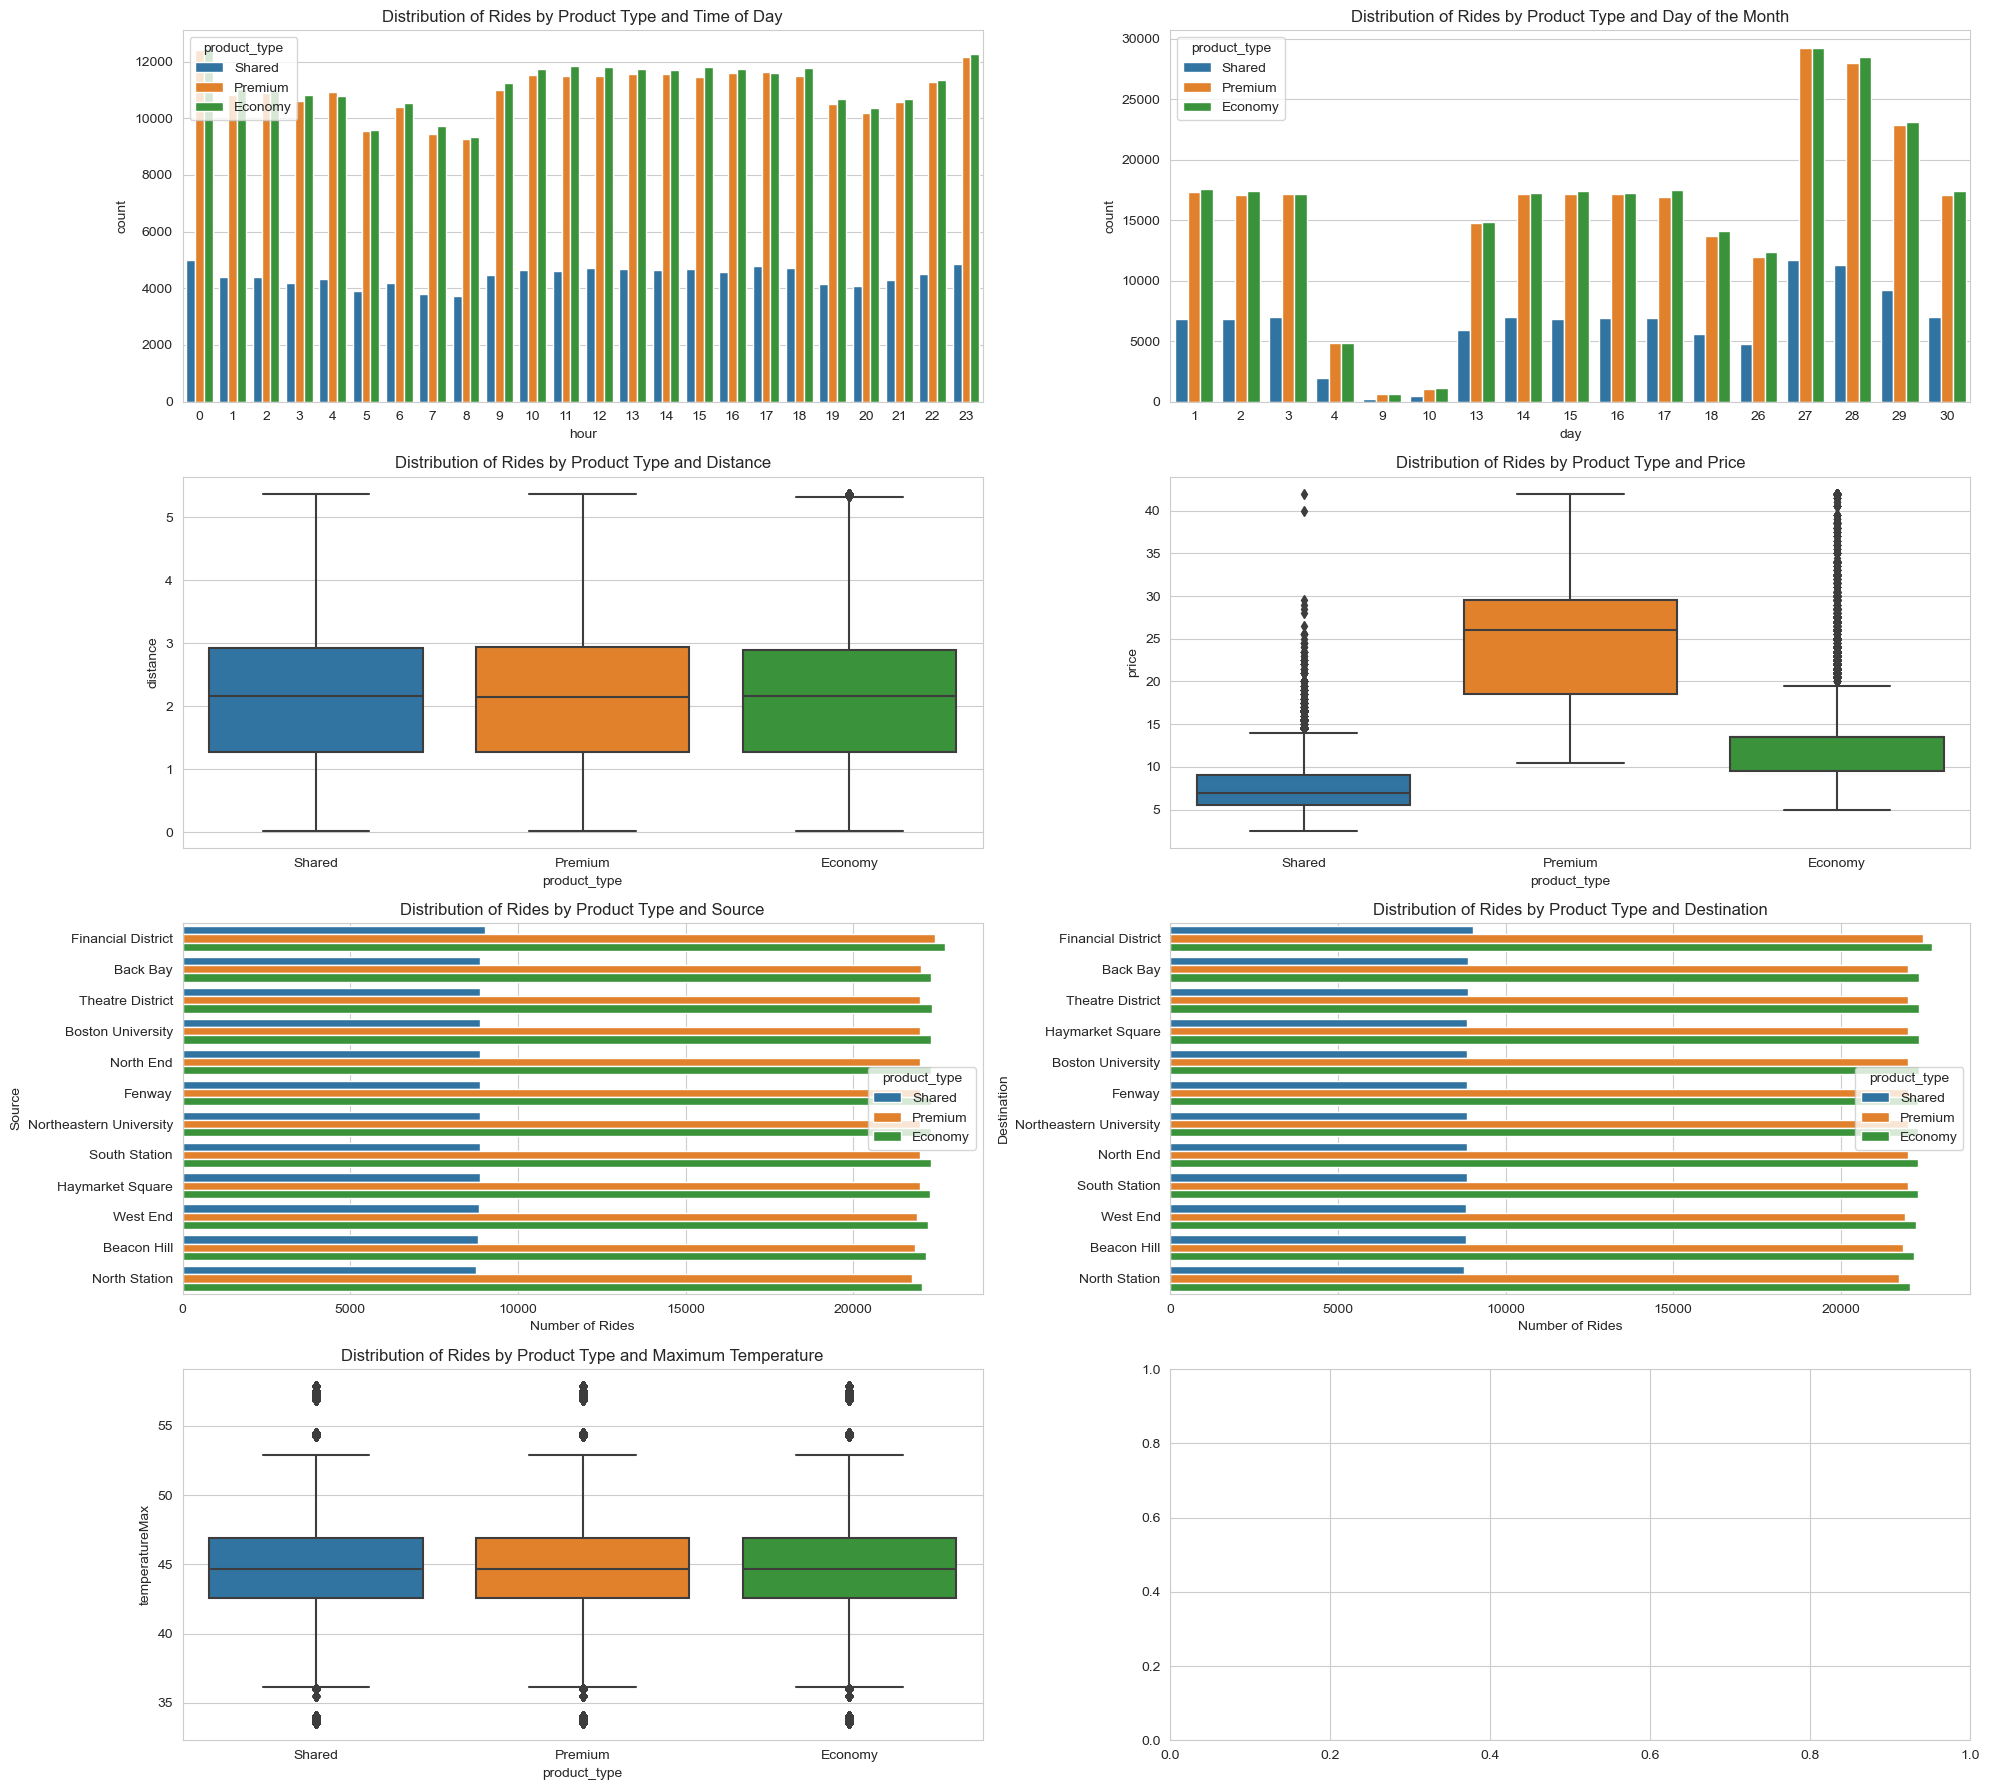

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for visualizations
sns.set_style("whitegrid")

# Filter out 'product_type = other'
filtered_data = data[data['product_type']!= 'Other']

# Create a figure with multiple subplots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20, 18))

# 1. Time of the day
sns.countplot(data=filtered_data, x='hour', hue='product_type', ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Rides by Product Type and Time of Day')

# 2. Day of the month
sns.countplot(data=filtered_data, x='day', hue='product_type', ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Rides by Product Type and Day of the Month')

# 3. Distance
sns.boxplot(data=filtered_data, x='product_type', y='distance', ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Rides by Product Type and Distance')

# 4. Price
sns.boxplot(data=filtered_data, x='product_type', y='price', ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Rides by Product Type and Price')

# 5. Temperature
sns.boxplot(data=filtered_data, x='product_type', y='temperatureMax', ax=axes[3, 0])
axes[3, 0].set_title('Distribution of Rides by Product Type and Maximum Temperature')

# Source: Count of rides from different sources by product type
sns.countplot(data=filtered_data, y='source', hue='product_type', ax=axes[2, 0], order=filtered_data['source'].value_counts().index)
axes[2, 0].set_title('Distribution of Rides by Product Type and Source')
axes[2, 0].set_xlabel('Number of Rides')
axes[2, 0].set_ylabel('Source')

# Destination: Count of rides to different destinations by product type
sns.countplot(data=filtered_data, y='destination', hue='product_type', ax=axes[2, 1], order=filtered_data['destination'].value_counts().index)
axes[2, 1].set_title('Distribution of Rides by Product Type and Destination')
axes[2, 1].set_xlabel('Number of Rides')
axes[2, 1].set_ylabel('Destination')

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
# Time of Day:
# a)Economy rides are most popular, showing consistent demand with peaks in early morning and late evening, possibly 
# for commuters and late-night travelers. Premium rides follow a similar pattern but have fewer rides overall, 
# which might indicate a preference for more comfortable or private rides when available or needed, albeit by fewer
# customers. Shared rides are the least popular, especially in the early morning, suggesting that customers may prefer 
# not to share rides when traveling to work or when shared ride options might be less available.
# b)Customers choose different types of rides throughout the day with no significant variation in preference for time.
# This suggests that the time of day may not be a strong determinant for choosing a specific 'product_type'.

# Day of the Month:
# a)The demand for Economy rides might be consistent, suggesting that customers rely on it for regular transport
# irrespective of the day of the month. Premium rides see a slight fluctuation but generally maintain a steady
# choice and Shared rides might be the most variable, potentially indicating that it's a situational preference 
# rather than a daily need
# b)This could imply that the choice of "product_type" is stable over the month and not influenced by factors such 
# as payday cycles which might have shown a spike for more expensive options after paydays.

# Distance:
# a)The box plot indicates that Economy rides might be chosen for shorter to moderate distances, appealing to those
# who are price-sensitive. Premium rides could be preferred for longer distances, indicating a desire for comfort 
# or amenities during longer trips. Shared rides may be less common for any distance, possibly due to the 
# unpredictability or preferences for privacy.
# b)This Suggests that 'distance' can be a strong determinant for choosing a specific 'product_type'

# Price:
# a)Economy rides  have a lower and more consistent price range, attracting cost-conscious customers.
# Premium rides likely have a broader range of prices, reflecting varied customer willingness to pay for extra comfort.
# Shared rides, possibly being the cheapest, might still see less preference due to the trade-off with convenience or privacy.
# b)This Suggests that 'Price' can be a strong determinant for choosing a specific 'product_type'

# Destination:
# a)Economy rides might be uniformly chosen for all destinations, indicating a general preference for cost-saving.
# Premium rides could be more frequently chosen for business or upscale districts, aligning with a preference for status 
# or comfort. Shared rides may be less preferred to specific destinations, possibly due to the increased time from
# multiple stops or the social dynamics of sharing.
# b)This Suggests that 'Destination' can be a strong determinant for choosing a specific 'product_type'

# Maximum Temperature:
# a)Economy rides may show little variation with temperature changes, as they are chosen for their cost-effectiveness
# rather than comfort. Premium rides could see increased use during extreme temperatures, offering a more controlled 
# and comfortable environment. Shared rides may be less influenced by temperature, but any variations might be more 
# related to the availability of riders and willingness to share in uncomfortable conditions.
# b)This Suggests that 'Price' can be a strong determinant for choosing a specific 'product_type'